## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.6ms	remaining: 58.6s
1:	learn: 0.9606716	total: 59.6ms	remaining: 29.8s
2:	learn: 0.9390920	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9209237	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9046978	total: 62.8ms	remaining: 12.5s
5:	learn: 0.8896854	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8724151	total: 64.7ms	remaining: 9.18s
7:	learn: 0.8558633	total: 65.7ms	remaining: 8.15s
8:	learn: 0.8400199	total: 66.7ms	remaining: 7.34s
9:	learn: 0.8229065	total: 67.6ms	remaining: 6.69s
10:	learn: 0.8057776	total: 68.4ms	remaining: 6.15s
11:	learn: 0.7907426	total: 69.8ms	remaining: 5.74s
12:	learn: 0.7753485	total: 70.7ms	remaining: 5.36s
13:	learn: 0.7601130	total: 71.4ms	remaining: 5.03s
14:	learn: 0.7475256	total: 72.2ms	remaining: 4.74s
15:	learn: 0.7326054	total: 73ms	remaining: 4.49s
16:	learn: 0.7206853	total: 73.8ms	remaining: 4.27s
17:	learn: 0.7077303	total: 74.8ms	remaining: 4.08s
18:	learn: 0.6955287	total: 75.6ms	remaining: 

103:	learn: 0.3030824	total: 150ms	remaining: 1.29s
104:	learn: 0.3013455	total: 151ms	remaining: 1.29s
105:	learn: 0.2996238	total: 152ms	remaining: 1.28s
106:	learn: 0.2980370	total: 153ms	remaining: 1.28s
107:	learn: 0.2965967	total: 155ms	remaining: 1.28s
108:	learn: 0.2951864	total: 156ms	remaining: 1.27s
109:	learn: 0.2942861	total: 157ms	remaining: 1.27s
110:	learn: 0.2932928	total: 158ms	remaining: 1.26s
111:	learn: 0.2916150	total: 158ms	remaining: 1.26s
112:	learn: 0.2903158	total: 159ms	remaining: 1.25s
113:	learn: 0.2893044	total: 160ms	remaining: 1.24s
114:	learn: 0.2880453	total: 161ms	remaining: 1.24s
115:	learn: 0.2868924	total: 162ms	remaining: 1.23s
116:	learn: 0.2854905	total: 163ms	remaining: 1.23s
117:	learn: 0.2838426	total: 164ms	remaining: 1.23s
118:	learn: 0.2827228	total: 165ms	remaining: 1.22s
119:	learn: 0.2820207	total: 166ms	remaining: 1.22s
120:	learn: 0.2807575	total: 167ms	remaining: 1.21s
121:	learn: 0.2800950	total: 168ms	remaining: 1.21s
122:	learn: 

150:	learn: 0.2527124	total: 192ms	remaining: 1.08s
151:	learn: 0.2520669	total: 193ms	remaining: 1.07s
152:	learn: 0.2511829	total: 194ms	remaining: 1.07s
153:	learn: 0.2507161	total: 195ms	remaining: 1.07s
154:	learn: 0.2497802	total: 196ms	remaining: 1.07s
155:	learn: 0.2490613	total: 197ms	remaining: 1.06s
156:	learn: 0.2484356	total: 198ms	remaining: 1.06s
157:	learn: 0.2475208	total: 199ms	remaining: 1.06s
158:	learn: 0.2467460	total: 199ms	remaining: 1.05s
159:	learn: 0.2461317	total: 200ms	remaining: 1.05s
160:	learn: 0.2456028	total: 201ms	remaining: 1.05s
161:	learn: 0.2449256	total: 202ms	remaining: 1.04s
162:	learn: 0.2444113	total: 203ms	remaining: 1.04s
163:	learn: 0.2438126	total: 204ms	remaining: 1.04s
164:	learn: 0.2432080	total: 204ms	remaining: 1.03s
165:	learn: 0.2425986	total: 205ms	remaining: 1.03s
166:	learn: 0.2421108	total: 206ms	remaining: 1.03s
167:	learn: 0.2413956	total: 207ms	remaining: 1.02s
168:	learn: 0.2407630	total: 208ms	remaining: 1.02s
169:	learn: 

296:	learn: 0.1788226	total: 324ms	remaining: 767ms
297:	learn: 0.1784691	total: 325ms	remaining: 766ms
298:	learn: 0.1781306	total: 326ms	remaining: 765ms
299:	learn: 0.1778034	total: 327ms	remaining: 763ms
300:	learn: 0.1773609	total: 328ms	remaining: 761ms
301:	learn: 0.1771097	total: 329ms	remaining: 759ms
302:	learn: 0.1766351	total: 329ms	remaining: 758ms
303:	learn: 0.1762749	total: 330ms	remaining: 756ms
304:	learn: 0.1758184	total: 331ms	remaining: 754ms
305:	learn: 0.1755761	total: 332ms	remaining: 753ms
306:	learn: 0.1752450	total: 333ms	remaining: 751ms
307:	learn: 0.1748989	total: 334ms	remaining: 751ms
308:	learn: 0.1745082	total: 335ms	remaining: 749ms
309:	learn: 0.1740813	total: 336ms	remaining: 747ms
310:	learn: 0.1738419	total: 337ms	remaining: 746ms
311:	learn: 0.1734089	total: 337ms	remaining: 744ms
312:	learn: 0.1731178	total: 338ms	remaining: 742ms
313:	learn: 0.1727077	total: 339ms	remaining: 741ms
314:	learn: 0.1723778	total: 340ms	remaining: 739ms
315:	learn: 

345:	learn: 0.1630031	total: 366ms	remaining: 691ms
346:	learn: 0.1625470	total: 367ms	remaining: 690ms
347:	learn: 0.1622545	total: 367ms	remaining: 688ms
348:	learn: 0.1619905	total: 368ms	remaining: 687ms
349:	learn: 0.1619095	total: 369ms	remaining: 685ms
350:	learn: 0.1616910	total: 370ms	remaining: 684ms
351:	learn: 0.1613933	total: 371ms	remaining: 683ms
352:	learn: 0.1611181	total: 372ms	remaining: 681ms
353:	learn: 0.1607851	total: 373ms	remaining: 680ms
354:	learn: 0.1604549	total: 374ms	remaining: 679ms
355:	learn: 0.1601748	total: 374ms	remaining: 677ms
356:	learn: 0.1600802	total: 375ms	remaining: 676ms
357:	learn: 0.1598210	total: 376ms	remaining: 674ms
358:	learn: 0.1595903	total: 377ms	remaining: 673ms
359:	learn: 0.1593606	total: 378ms	remaining: 671ms
360:	learn: 0.1590600	total: 378ms	remaining: 670ms
361:	learn: 0.1587473	total: 379ms	remaining: 668ms
362:	learn: 0.1585815	total: 380ms	remaining: 667ms
363:	learn: 0.1583085	total: 381ms	remaining: 665ms
364:	learn: 

496:	learn: 0.1287492	total: 513ms	remaining: 519ms
497:	learn: 0.1285331	total: 514ms	remaining: 518ms
498:	learn: 0.1281784	total: 515ms	remaining: 517ms
499:	learn: 0.1280343	total: 516ms	remaining: 516ms
500:	learn: 0.1278285	total: 517ms	remaining: 514ms
501:	learn: 0.1275819	total: 517ms	remaining: 513ms
502:	learn: 0.1274923	total: 518ms	remaining: 512ms
503:	learn: 0.1273702	total: 519ms	remaining: 511ms
504:	learn: 0.1272349	total: 520ms	remaining: 510ms
505:	learn: 0.1271260	total: 521ms	remaining: 509ms
506:	learn: 0.1270468	total: 522ms	remaining: 508ms
507:	learn: 0.1268447	total: 523ms	remaining: 506ms
508:	learn: 0.1266565	total: 524ms	remaining: 505ms
509:	learn: 0.1265379	total: 525ms	remaining: 504ms
510:	learn: 0.1264936	total: 525ms	remaining: 503ms
511:	learn: 0.1263041	total: 526ms	remaining: 502ms
512:	learn: 0.1260636	total: 527ms	remaining: 500ms
513:	learn: 0.1257801	total: 528ms	remaining: 499ms
514:	learn: 0.1254765	total: 529ms	remaining: 498ms
515:	learn: 

544:	learn: 0.1208536	total: 554ms	remaining: 463ms
545:	learn: 0.1207734	total: 555ms	remaining: 462ms
546:	learn: 0.1205887	total: 556ms	remaining: 461ms
547:	learn: 0.1203470	total: 557ms	remaining: 459ms
548:	learn: 0.1201638	total: 558ms	remaining: 458ms
549:	learn: 0.1200067	total: 559ms	remaining: 457ms
550:	learn: 0.1198272	total: 559ms	remaining: 456ms
551:	learn: 0.1195666	total: 560ms	remaining: 455ms
552:	learn: 0.1194183	total: 561ms	remaining: 454ms
553:	learn: 0.1191881	total: 562ms	remaining: 452ms
554:	learn: 0.1189026	total: 563ms	remaining: 451ms
555:	learn: 0.1187021	total: 564ms	remaining: 450ms
556:	learn: 0.1185118	total: 565ms	remaining: 449ms
557:	learn: 0.1183468	total: 565ms	remaining: 448ms
558:	learn: 0.1181768	total: 566ms	remaining: 447ms
559:	learn: 0.1179853	total: 567ms	remaining: 446ms
560:	learn: 0.1177859	total: 568ms	remaining: 444ms
561:	learn: 0.1175936	total: 569ms	remaining: 443ms
562:	learn: 0.1174509	total: 570ms	remaining: 442ms
563:	learn: 

713:	learn: 0.0957051	total: 704ms	remaining: 282ms
714:	learn: 0.0955957	total: 705ms	remaining: 281ms
715:	learn: 0.0954229	total: 706ms	remaining: 280ms
716:	learn: 0.0953297	total: 707ms	remaining: 279ms
717:	learn: 0.0952661	total: 708ms	remaining: 278ms
718:	learn: 0.0951403	total: 709ms	remaining: 277ms
719:	learn: 0.0950328	total: 709ms	remaining: 276ms
720:	learn: 0.0948868	total: 711ms	remaining: 275ms
721:	learn: 0.0948780	total: 712ms	remaining: 274ms
722:	learn: 0.0947437	total: 712ms	remaining: 273ms
723:	learn: 0.0945983	total: 714ms	remaining: 272ms
724:	learn: 0.0944727	total: 715ms	remaining: 271ms
725:	learn: 0.0943233	total: 715ms	remaining: 270ms
726:	learn: 0.0941602	total: 716ms	remaining: 269ms
727:	learn: 0.0940411	total: 717ms	remaining: 268ms
728:	learn: 0.0939229	total: 718ms	remaining: 267ms
729:	learn: 0.0938195	total: 718ms	remaining: 266ms
730:	learn: 0.0936964	total: 719ms	remaining: 265ms
731:	learn: 0.0935119	total: 720ms	remaining: 264ms
732:	learn: 

761:	learn: 0.0901566	total: 745ms	remaining: 233ms
762:	learn: 0.0900882	total: 746ms	remaining: 232ms
763:	learn: 0.0899894	total: 747ms	remaining: 231ms
764:	learn: 0.0898732	total: 748ms	remaining: 230ms
765:	learn: 0.0897384	total: 749ms	remaining: 229ms
766:	learn: 0.0896966	total: 750ms	remaining: 228ms
767:	learn: 0.0895544	total: 750ms	remaining: 227ms
768:	learn: 0.0893441	total: 751ms	remaining: 226ms
769:	learn: 0.0891873	total: 752ms	remaining: 225ms
770:	learn: 0.0890086	total: 753ms	remaining: 224ms
771:	learn: 0.0888501	total: 754ms	remaining: 223ms
772:	learn: 0.0886622	total: 755ms	remaining: 222ms
773:	learn: 0.0885537	total: 756ms	remaining: 221ms
774:	learn: 0.0884440	total: 756ms	remaining: 220ms
775:	learn: 0.0883600	total: 757ms	remaining: 219ms
776:	learn: 0.0882487	total: 758ms	remaining: 218ms
777:	learn: 0.0881022	total: 759ms	remaining: 217ms
778:	learn: 0.0879793	total: 760ms	remaining: 216ms
779:	learn: 0.0879265	total: 761ms	remaining: 215ms
780:	learn: 

934:	learn: 0.0736677	total: 895ms	remaining: 62.2ms
935:	learn: 0.0735927	total: 896ms	remaining: 61.3ms
936:	learn: 0.0734929	total: 897ms	remaining: 60.3ms
937:	learn: 0.0733790	total: 897ms	remaining: 59.3ms
938:	learn: 0.0733648	total: 898ms	remaining: 58.4ms
939:	learn: 0.0732843	total: 899ms	remaining: 57.4ms
940:	learn: 0.0732315	total: 900ms	remaining: 56.4ms
941:	learn: 0.0731403	total: 901ms	remaining: 55.5ms
942:	learn: 0.0730199	total: 902ms	remaining: 54.5ms
943:	learn: 0.0729180	total: 903ms	remaining: 53.6ms
944:	learn: 0.0728465	total: 904ms	remaining: 52.6ms
945:	learn: 0.0728162	total: 905ms	remaining: 51.6ms
946:	learn: 0.0726765	total: 905ms	remaining: 50.7ms
947:	learn: 0.0726307	total: 906ms	remaining: 49.7ms
948:	learn: 0.0725315	total: 907ms	remaining: 48.7ms
949:	learn: 0.0724728	total: 908ms	remaining: 47.8ms
950:	learn: 0.0723660	total: 909ms	remaining: 46.8ms
951:	learn: 0.0722875	total: 909ms	remaining: 45.8ms
952:	learn: 0.0721778	total: 910ms	remaining: 

982:	learn: 0.0700271	total: 936ms	remaining: 16.2ms
983:	learn: 0.0699035	total: 937ms	remaining: 15.2ms
984:	learn: 0.0697808	total: 938ms	remaining: 14.3ms
985:	learn: 0.0696729	total: 939ms	remaining: 13.3ms
986:	learn: 0.0695978	total: 940ms	remaining: 12.4ms
987:	learn: 0.0695103	total: 941ms	remaining: 11.4ms
988:	learn: 0.0694633	total: 942ms	remaining: 10.5ms
989:	learn: 0.0693641	total: 943ms	remaining: 9.52ms
990:	learn: 0.0693544	total: 944ms	remaining: 8.57ms
991:	learn: 0.0692877	total: 944ms	remaining: 7.62ms
992:	learn: 0.0691795	total: 945ms	remaining: 6.66ms
993:	learn: 0.0690561	total: 946ms	remaining: 5.71ms
994:	learn: 0.0689593	total: 947ms	remaining: 4.76ms
995:	learn: 0.0688740	total: 948ms	remaining: 3.81ms
996:	learn: 0.0688345	total: 949ms	remaining: 2.85ms
997:	learn: 0.0688269	total: 950ms	remaining: 1.9ms
998:	learn: 0.0687463	total: 950ms	remaining: 951us
999:	learn: 0.0687026	total: 951ms	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16950164030990952


#### Sanity Checks 

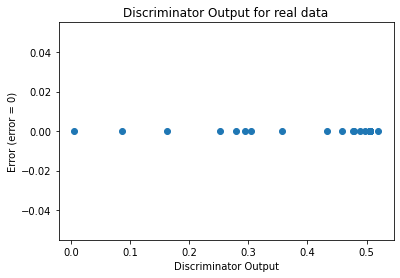

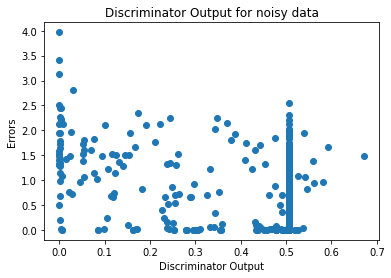

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 199


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.09406091238806975


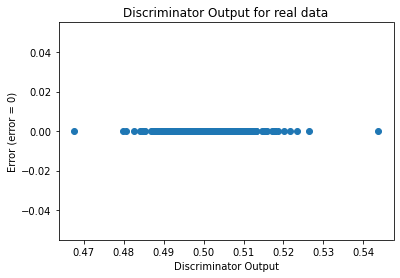

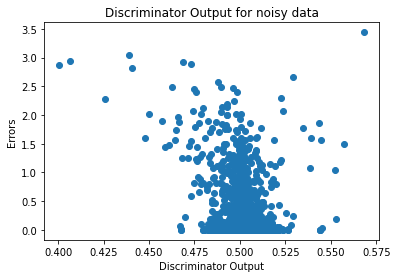

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.015846313370815907


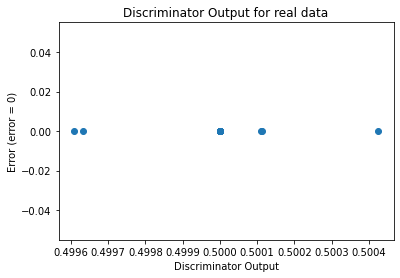

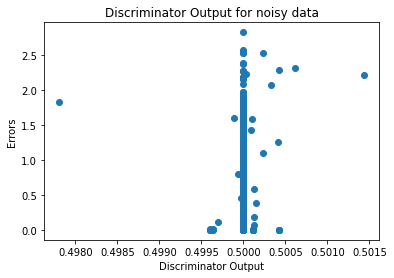

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0390]], requires_grad=True)
